This data set contains weighted census data extracted from the 1994 and 1995 current population surveys conducted by the U.S. Census Bureau. The data contains demographic and employment related variables

Prediction task is to determine the income level for the person
| represented by the record.  Incomes have been binned at the $50K
| level to present a binary classification problem, much like the
| original UCI/ADULT database.  The goal field of this data, however,
| was drawn from the "total person income" field rather than the
| "adjusted gross income" and may, therefore, behave differently than the
| orginal ADULT goal field.

age						AAGE
class of worker					ACLSWKR
industry code					ADTIND
occupation code					ADTOCC
adjusted gross income				AGI
education					AHGA
wage per hour					AHRSPAY
enrolled in edu inst last wk			AHSCOL
marital status					AMARITL
major industry code				AMJIND
major occupation code				AMJOCC
mace						ARACE
hispanic Origin					AREORGN
sex						ASEX
member of a labor union				AUNMEM
reason for unemployment				AUNTYPE
full or part time employment stat		AWKSTAT
capital gains					CAPGAIN
capital losses					CAPLOSS
divdends from stocks				DIVVAL
federal income tax liability			FEDTAX
tax filer status				FILESTAT
region of previous residence			GRINREG
state of previous residence			GRINST
detailed household and family stat		HHDFMX
detailed household summary in household		HHDREL
instance weight					MARSUPWT
migration code-change in msa			MIGMTR1
migration code-change in reg			MIGMTR3
migration code-move within reg			MIGMTR4
live in this house 1 year ago			MIGSAME
migration prev res in sunbelt			MIGSUN
num persons worked for employer			NOEMP
family members under 18				PARENT
total person earnings				PEARNVAL
country of birth father				PEFNTVTY
country of birth mother				PEMNTVTY
country of birth self				PENATVTY
citizenship					PRCITSHP
total person income				PTOTVAL
own business or self employed			SEOTR
taxable income amount				TAXINC
fill inc questionnaire for veteran's admin	VETQVA
veterans benefits				VETYN
weeks worked in year				WKSWORK
Note that Incomes have been binned at the $50K level to present a binary classification problem, much like the original UCI/ADULT database. The goal field of this data, however, was drawn from the "total person income" field rather than the "adjusted gross income" and may, therefore, behave differently than the orginal ADULT goal field.


road map

look in to the data
make some hypothesis
descriptive statistics
visualization
preprocessing the data
hypothesis

modeling: classification 
naive bayes
svm
tree based


In [1]:
# load the packages and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path = 'D:\\census-income.test'

In [3]:
data_train = pd.read_csv(path+'\\train.csv')

In [4]:
data_test = pd.read_csv(path+'\\test.csv')

In [5]:
data_train.head(3)

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000


In [49]:
data_test.head(2)

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,-50000
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,-50000


In [137]:
# lets separate numarical and categorical

In [155]:
data_cat = {}
def f(cat):
    
    for i in cat.columns:
        if cat[i].dtype == np.object:
            data_cat[i] = cat[i]
    

In [156]:
f(data_train)


In [158]:
f(data_test)

In [159]:
data_cat2 = pd.DataFrame(data_cat)

In [105]:
f(data_test)

In [161]:
data_cat1.shape

(199523, 28)

In [162]:
data_cat2.shape

(99762, 29)

In [174]:
data_num = {} 
def f(num):
    for i in num.columns:
        if num[i].dtype != np.object:
            data_num[i] = num[i]

In [164]:
f(data_train)

In [175]:
f(data_test)

In [176]:
data_num2 = pd.DataFrame(data_num)

In [168]:
data_num1.shape

(199523, 13)

In [177]:
data_num2.shape

(99762, 12)

In [178]:
data_num1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 13 columns):
age                           199523 non-null int64
business_or_self_employed     199523 non-null int64
capital_gains                 199523 non-null int64
capital_losses                199523 non-null int64
dividend_from_Stocks          199523 non-null int64
income_level                  199523 non-null int64
industry_code                 199523 non-null int64
num_person_Worked_employer    199523 non-null int64
occupation_code               199523 non-null int64
veterans_benefits             199523 non-null int64
wage_per_hour                 199523 non-null int64
weeks_worked_in_year          199523 non-null int64
year                          199523 non-null int64
dtypes: int64(13)
memory usage: 19.8 MB


In [32]:
data_num1['income_level'].value_counts()

-50000    187141
 50000     12382
Name: income_level, dtype: int64

In [35]:
#data_num1['wage_per_hour'].value_counts().sort

In [36]:
data_num1['veterans_benefits'].value_counts()

2    150130
0     47409
1      1984
Name: veterans_benefits, dtype: int64

In [224]:
total_income = []
for i in data_num1['income_level']:
    if i == -50000:
        i = 0
        total_income.append(i)
    else:
        
        i = 1
        total_income.append(i)

In [225]:
data_num1['total_income'] = total_income

In [67]:
def f(a):
    sns.distplot(a,kde=False)


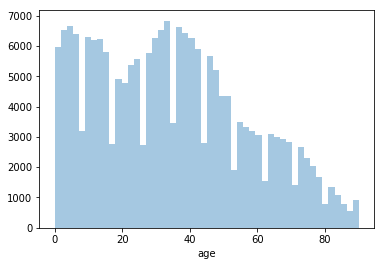

In [69]:
f(data_num1['age'])



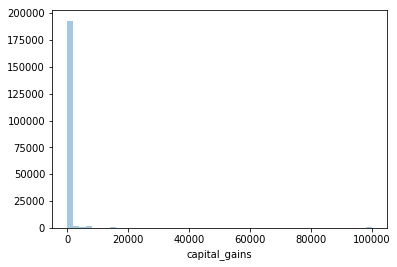

In [71]:
f(data_num1['capital_gains'])

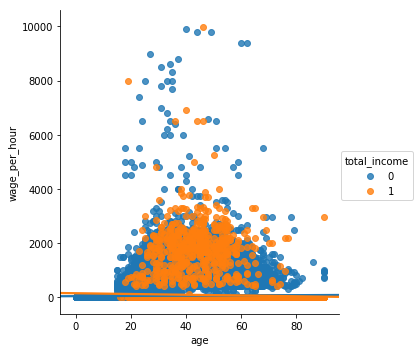

In [165]:
sns.lmplot(x='age',y='wage_per_hour',data=data_num1,hue='total_income')

In [167]:
# lets look at imbalance in data

In [168]:
(data_train['income_level'].value_counts()*100)

-50000    18714100
 50000     1238200
Name: income_level, dtype: int64

In [72]:
data_train.shape

(199523, 41)

In [73]:
18714100/199523

93.79419916500855

In [74]:
1238200/199523

6.205800834991455

In [175]:
# visualization of categorical

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

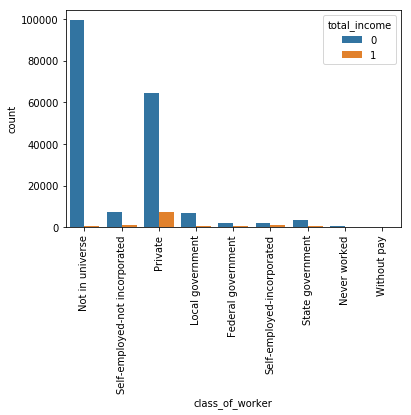

In [178]:
sns.countplot(data_cat1['class_of_worker'],hue=data_num1['total_income'])
plt.xticks( rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

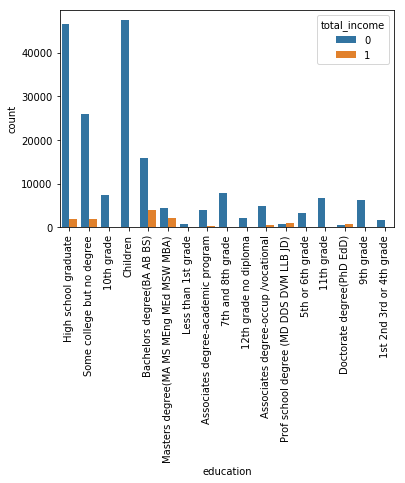

In [184]:
sns.countplot(data_cat1['education'],hue=data_num1['total_income'])
plt.xticks( rotation='vertical')

In [75]:
data_num1.isnull().sum()

age                           0
business_or_self_employed     0
capital_gains                 0
capital_losses                0
dividend_from_Stocks          0
income_level                  0
industry_code                 0
num_person_Worked_employer    0
occupation_code               0
veterans_benefits             0
wage_per_hour                 0
weeks_worked_in_year          0
year                          0
total_income                  0
dtype: int64

In [201]:
a = data_num1.corr()

In [202]:
a

,age,business_or_self_employed,capital_gains,capital_losses,dividend_from_Stocks,income_level,industry_code,num_person_Worked_employer,occupation_code,veterans_benefits,wage_per_hour,weeks_worked_in_year,year,total_income
age,1.000000,-0.002265,0.053590,0.063351,0.104976,0.135720,0.157822,0.140887,0.117414,0.674844,0.036938,0.206181,0.004413,0.135720
business_or_self_employed,-0.002265,1.000000,0.015048,0.024116,-0.004885,0.040473,0.252694,0.240553,0.228952,0.177448,0.054051,0.265872,0.007377,0.040473
capital_gains,0.053590,0.015048,1.000000,-0.012700,0.131476,0.240725,0.066017,0.058015,0.002534,0.051530,-0.001082,0.083549,0.005243,0.240725
capital_losses,0.063351,0.024116,-0.012700,1.000000,0.042427,0.147417,0.072586,0.084255,0.043680,0.075391,0.010993,0.100762,0.000096,0.147417
dividend_from_Stocks,0.104976,-0.004885,0.131476,0.042427,1.000000,0.175779,0.012774,0.007206,-0.026726,0.054585,-0.005731,0.013823,0.001913,0.175779
income_level,0.135720,0.040473,0.240725,0.147417,0.175779,1.000000,0.196190,0.222684,0.013414,0.140930,0.024528,0.262316,0.014794,1.000000
industry_code,0.157822,0.252694,0.066017,0.072586,0.012774,0.196190,1.000000,0.642096,0.563493,0.476475,0.165980,0.754472,0.003430,0.196190
num_person_Worked_employer,0.140887,0.240553,0.058015,0.084255,0.007206,0.222684,0.642096,1.000000,0.515554,0.463334,0.191543,0.747302,0.018774,0.222684
occupation_code,0.117414,0.228952,0.002534,0.043680,-0.026726,0.013414,0.563493,0.515554,1.000000,0.438680,0.194498,0.655613,-0.003140,0.013414
veterans_benefits,0.674844,0.177448,0.051530,0.075391,0.054585,0.140930,0.476475,0.463334,0.438680,1.000000,0.113094,0.532279,0.003122,0.140930


In [182]:
data_num1.drop(['weeks_worked_in_year'],inplace=True,axis=1)

In [183]:
data_num2.drop(['weeks_worked_in_year'],inplace=True,axis=1)

In [77]:
data_num1.describe()

,age,business_or_self_employed,capital_gains,capital_losses,dividend_from_Stocks,income_level,industry_code,num_person_Worked_employer,occupation_code,veterans_benefits,wage_per_hour,year,total_income
count,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,0.175438,434.71899,37.313788,197.529533,-43794.199165,15.352320,1.956180,11.306556,1.514833,55.426908,94.499672,0.062058
std,22.310895,0.553694,4697.53128,271.896428,1984.163658,24126.148404,18.067129,2.365126,14.454204,0.851473,274.896454,0.500001,0.241261
min,0.000000,0.000000,0.00000,0.000000,0.000000,-50000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000
25%,15.000000,0.000000,0.00000,0.000000,0.000000,-50000.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000,0.000000
50%,33.000000,0.000000,0.00000,0.000000,0.000000,-50000.000000,0.000000,1.000000,0.000000,2.000000,0.000000,94.000000,0.000000
75%,50.000000,0.000000,0.00000,0.000000,0.000000,-50000.000000,33.000000,4.000000,26.000000,2.000000,0.000000,95.000000,0.000000
max,90.000000,2.000000,99999.00000,4608.000000,99999.000000,50000.000000,51.000000,6.000000,46.000000,2.000000,9999.000000,95.000000,1.000000


In [252]:

m = data_cat1.apply(lambda x : np.sum(pd.isnull(x))/len(x)*100)

In [184]:
data_cat1.drop(['migration_msa','migration_reg','migration_sunbelt','migration_within_reg'],inplace=True,axis=1)

In [185]:
data_cat2.drop(['migration_msa','migration_reg','migration_sunbelt','migration_within_reg'],inplace=True,axis=1)

In [190]:
data_cat1.fillna('?',inplace = True)

In [191]:
data_cat1.isnull().sum()

citizenship                         0
class_of_worker                     0
country_father                      0
country_mother                      0
country_self                        0
d_household_family_stat             0
d_household_summary                 0
education                           0
enrolled_in_edu_inst_lastwk         0
family_members_under_18             0
fill_questionnaire_veteran_admin    0
full_parttime_employment_stat       0
hispanic_origin                     0
live_1_year_ago                     0
major_industry_code                 0
major_occupation_code               0
marital_status                      0
member_of_labor_union               0
race                                0
reason_for_unemployment             0
region_of_previous_residence        0
sex                                 0
state_of_previous_residence         0
tax_filer_status                    0
dtype: int64

In [192]:
bins = [0,30,60,91]

In [193]:
data_num1['age2'] = pd.cut(data_num1['age'],bins,labels=['young','adult','old'])

In [194]:
data_num2['age2'] = pd.cut(data_num2['age'],bins,labels=['young','adult','old'])

In [197]:
wages_hour = []
for i in data_num2['wage_per_hour']:
    if i == 0:
        i = "Zero"
        wages_hour.append(i)
    else:
        i = "Not Zero"
        wages_hour.append(i)

In [196]:
data_num1['wages_hour'] = wages_hour

In [198]:
data_num2['wages_hour'] = wages_hour

In [121]:
data_num1.head()

,age,business_or_self_employed,capital_gains,capital_losses,dividend_from_Stocks,income_level,industry_code,num_person_Worked_employer,occupation_code,veterans_benefits,wage_per_hour,year,total_income,age2,wages_hour
0,73,0,0,0,0,-50000,0,0,0,2,0,95,0,old,Zero
1,58,0,0,0,0,-50000,4,1,34,2,0,94,0,adult,Zero
2,18,0,0,0,0,-50000,0,0,0,2,0,95,0,young,Zero
3,9,0,0,0,0,-50000,0,0,0,0,0,94,0,young,Zero
4,10,0,0,0,0,-50000,0,0,0,0,0,94,0,young,Zero


In [205]:
capital_gain = []
for i in data_num1['capital_gains']:
    if i == 0:
        i = "Zero"
        capital_gain.append(i)
    else:
        i = "Not Zero"
        capital_gain.append(i)

In [ ]:
capital_loss = []
for i in data_num1['capital_losses']:
    if i == 0:
        i = "Zero"
        capital_loss.append(i)
    else:
        i = "Not Zero"
        capital_loss.append(i)

In [207]:
divident = []
for i in data_num1['dividend_from_Stocks']:
    if i == 0:
        i = "Zero"
        divident.append(i)
    else:
        i = "Not Zero"
        divident.append(i)

In [208]:
data_num1['capital_gain'] = capital_gain

In [209]:
data_num1['divident'] = divident

In [ ]:
data_num1['capital_loss'] = capital_loss

In [210]:
data_num1.drop(['age','capital_gains','capital_losses','dividend_from_Stocks'],inplace=True,axis = 1)

In [211]:
data_num2.drop(['age','capital_gains','capital_losses','dividend_from_Stocks'],inplace=True,axis = 1)

In [147]:
data_cat1.drop(['total_income','total_income1','total_income2','income_level'],inplace=True,axis=1)

In [217]:
data_cat1.columns

Index(['citizenship', 'class_of_worker', 'country_father', 'country_mother',
       'country_self', 'd_household_family_stat', 'd_household_summary',
       'education', 'enrolled_in_edu_inst_lastwk', 'family_members_under_18',
       'fill_questionnaire_veteran_admin', 'full_parttime_employment_stat',
       'hispanic_origin', 'live_1_year_ago', 'major_industry_code',
       'major_occupation_code', 'marital_status', 'member_of_labor_union',
       'race', 'reason_for_unemployment', 'region_of_previous_residence',
       'sex', 'state_of_previous_residence', 'tax_filer_status'],
      dtype='object')

In [232]:
data_cat2.columns

Index(['citizenship', 'class_of_worker', 'country_father', 'country_mother',
       'country_self', 'd_household_family_stat', 'd_household_summary',
       'education', 'enrolled_in_edu_inst_lastwk', 'family_members_under_18',
       'fill_questionnaire_veteran_admin', 'full_parttime_employment_stat',
       'hispanic_origin', 'income_level', 'live_1_year_ago',
       'major_industry_code', 'major_occupation_code', 'marital_status',
       'member_of_labor_union', 'race', 'reason_for_unemployment',
       'region_of_previous_residence', 'sex', 'state_of_previous_residence',
       'tax_filer_status', 'total_income'],
      dtype='object')

In [219]:

total_income = []
for i in data_cat2['income_level']:
    if i == '-50000':
        i = 0
        total_income.append(i)
    else:
        
        i = 1
        total_income.append(i)

In [220]:
data_cat2['total_income'] = total_income

In [341]:
data_num1.columns

Index(['business_or_self_employed', 'industry_code',
       'num_person_Worked_employer', 'occupation_code', 'veterans_benefits',
       'wage_per_hour', 'year', 'age2', 'wages_hour', 'capital_gain',
       'divident', 'total_income'],
      dtype='object')

In [331]:
data_cat2.shape

(99762, 25)

In [344]:
data_num2.drop(['capital_loss'],inplace=True,axis=1)

In [235]:
data_cat1.shape

(199523, 24)

In [345]:
train_1 = pd.concat([data_num1,data_cat1],axis=1)

In [346]:
train_1.shape

(199523, 36)

In [474]:
test_3 = pd.concat([data_num2,data_cat2],axis=1)

In [349]:
train_Y = train_1['total_income']

In [476]:
test_p = test_3['total_income']

In [351]:
train_1.drop(['total_income'],inplace=True,axis = 1)

In [352]:
test_1.drop(['total_income'],inplace=True,axis=1)

In [458]:
from sklearn.preprocessing import LabelEncoder

In [459]:
 k = LabelEncoder()

In [472]:
h = []

def f(m):
    
    for x in m:
        if m[x].dtype == np.object:
            m[x] = k.fit_transform(m[x])
            h.append(m[x])

In [457]:
test_2.shape

(99762, 35)

In [356]:
f(train_1)

In [360]:
train = pd.DataFrame(train_p)

In [363]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, wages_hour to tax_filer_status
Columns: 199523 entries, 0 to 199522
dtypes: int64(199523)
memory usage: 41.1+ MB


In [477]:
f(test_3)

[]

In [478]:
test_c = pd.DataFrame(h)

In [480]:
test_a = np.transpose(test_c)

In [481]:
test_a.shape

(99762, 27)

In [366]:
from sklearn.tree import DecisionTreeClassifier

In [367]:
tree = DecisionTreeClassifier()

In [377]:
tree.fit(train,train_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [376]:
train = np.transpose(train)

In [482]:
y_pred = tree.predict(test_a)

In [385]:
from sklearn.metrics import confusion_matrix

In [484]:
m = confusion_matrix(test_p,y_pred)

In [485]:
m



array([[89427,  4149],
       [ 3834,  2352]], dtype=int64)

In [488]:
m.diagonal().sum()

91779

In [489]:
4149+3834

7983

In [490]:
91779/99762

0.9199795513321706